# Data project - An analysis of the Phillips curve and ECB's quantitative easing

In our project we are investigating whether the Phillips Curve and the associated negative relationship between inflation and unemployment is applicable to the world nowadays. We are collecting yearly rates of inflation and unemployment from the World Bank from 1991 to 2017 for selected countries. We're constructing two groups of countries: one group with selected countries from the European Union and another group of selected developed countries outside the European Union.

As the European Central Bank in 2015 imposed quantitative easing, we will analyse the effect of this monetary policy on the group of countries inside the European Union by comparing them to the group of countries outside the European Union - both for the full period from our sample (1991 to 2017) and for the period efter the implementation of the programme (2015 to 2017).

Our project includes a part with descriptive analysis and some associated plots to illustrate the most important statistical figures for our data and the development over time for inflation and unemployment rates. Afterwards we will perform a panel data regression analysis to investigate whether there has been a negative relationship between inflation and unemployment after the quantitative easing programme started in 2015. 

**Importing packages**

In [3]:
import pandas as pd
#pip install linearmodels #Run in terminal
from linearmodels import PanelOLS 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader
from pandas_datareader import wb
import seaborn as sns

**1. Downloading inflation and unemployment data from World bank**

In [4]:
cntr_eu = ['DK','SE','FR','NL','DE','GB','BE', 'LU', 'AT', 'FI'] # Subset of countries affected by ECB's QE
cntr_other = ['CA','CH','AU','NZ','SG','NO','US', 'JP', 'KR'] # Subset of countries not affected by ECB's QE

infl_eu = wb.download(indicator='FP.CPI.TOTL.ZG', country=cntr_eu, start=1991, end=2017) 
infl_other = wb.download(indicator='FP.CPI.TOTL.ZG', country=cntr_other, start=1991, end=2017)

unem_eu = wb.download(indicator='SL.UEM.TOTL.ZS', country=cntr_eu, start=1991, end=2017)
unem_other = wb.download(indicator='SL.UEM.TOTL.ZS', country=cntr_other, start=1991, end=2017)

**2. Data structuring**

In [5]:
merge_eu = pd.concat([infl_eu, unem_eu], axis=1)
merge_eu = merge_eu.reset_index() # Resetting index so "Year" can be treated as a variable instead of index
merge_eu.columns = ['country', 'year', 'inflation','unemployment'] #Naming the coloumns
merge_eu.year = merge_eu.year.astype(int) #Turning the years into integers

merge_other = pd.concat([infl_other, unem_other], axis=1)
merge_other = merge_other.reset_index() # Resetting index so "Year" can be treated as a variable instead of index
merge_other.columns = ['country', 'year', 'inflation','unemployment'] #Naming the coloumns
merge_other.year = merge_other.year.astype(int) #Turning the years into integers

#Making subset for when Quantative Easing was in effect
after_QE = merge_eu[merge_eu['year']>=2015]
after_QE_other = merge_other[merge_other['year']>=2015]

**3. Data description**

In [6]:
#Data description for selected EU-countries
mean_infl_eu = merge_eu.groupby("country")['inflation'].mean()
min_infl_eu = merge_eu.groupby("country")['inflation'].min()
max_infl_eu = merge_eu.groupby("country")['inflation'].max()
mean_unem_eu = merge_eu.groupby("country")['unemployment'].mean()
min_unem_eu = merge_eu.groupby("country")['unemployment'].min()
max_unem_eu = merge_eu.groupby("country")['unemployment'].max()

tabel1 = pd.concat([mean_infl_eu, min_infl_eu, max_infl_eu, mean_unem_eu, min_unem_eu, max_unem_eu], axis=1)
tabel1.columns = ['Average inflation', 'Mininum inflation', 'Maximum inflation', 'Average unemployment', 'Minimum unemployment', 'Maximum unemployment']
tabel1

,Average inflation,Mininum inflation,Maximum inflation,Average unemployment,Minimum unemployment,Maximum unemployment
country,,,,,,
Austria,2.065182,0.506308,4.020846,4.871852,3.42,6.01
Belgium,1.995226,-0.053146,4.489444,7.935185,6.18,9.65
Denmark,1.859173,0.250000,3.416268,6.148889,3.43,10.72
Finland,1.612535,-0.207929,4.310213,10.405556,6.37,17.00
France,1.519053,0.037514,3.213407,9.864815,7.06,12.59
Germany,1.808404,0.234430,5.056980,7.571481,3.75,11.17
Luxembourg,2.039444,0.290833,3.588098,3.956296,1.48,6.67
Netherlands,2.040096,0.316667,4.155841,4.985926,2.12,7.42
Sweden,1.659024,-0.494461,9.444627,7.175556,3.24,10.36


In [7]:
#Data description for selected other countries
mean_infl_other = merge_other.groupby("country")['inflation'].mean()
min_infl_other = merge_other.groupby("country")['inflation'].min()
max_infl_other = merge_other.groupby("country")['inflation'].max()
mean_unem_other = merge_other.groupby("country")['unemployment'].mean()
min_unem_other = merge_other.groupby("country")['unemployment'].min()
max_unem_other = merge_other.groupby("country")['unemployment'].max()

tabel2 = pd.concat([mean_infl_other, min_infl_other, max_infl_other, mean_unem_other, min_unem_other, max_unem_other], axis=1)
tabel2.columns = ['Average inflation', 'Mininum inflation', 'Maximum inflation', 'Average unemployment', 'Minimum unemployment', 'Maximum unemployment']
tabel2

,Average inflation,Mininum inflation,Maximum inflation,Average unemployment,Minimum unemployment,Maximum unemployment
country,,,,,,
Australia,2.481423,0.224888,4.627767,6.670000,4.23,10.87
Canada,1.909663,0.165563,5.625864,7.945556,6.04,11.38
Japan,0.358695,-1.352837,3.251438,3.917037,2.09,5.37
"Korea, Rep.",3.529237,0.706208,9.333361,3.500370,2.05,6.96
New Zealand,2.014295,-0.114267,4.027907,6.132259,3.60,10.67
Norway,2.123767,0.454499,3.753931,4.117778,2.49,6.31
Singapore,1.716387,-0.532286,6.627997,3.566815,1.69,5.93
Switzerland,0.981112,-1.143901,5.859586,3.854074,1.78,4.92
United States,2.362682,-0.355546,4.234964,6.003704,3.99,9.63


**4. Plots**

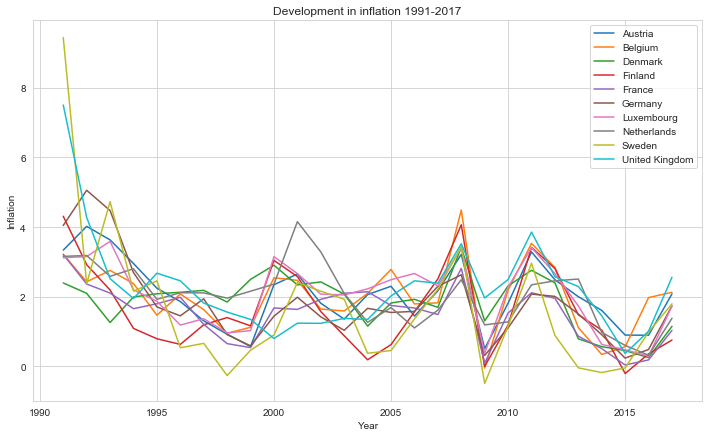

In [72]:
#Development in inflation over time - eu countries
merge_eu.set_index('year').groupby('country')['inflation'].plot(legend=True, figsize=(12,7))
plt.title("Development in inflation 1991-2017")
plt.xlabel("Year")
plt.ylabel("Inflation")
plt.show()

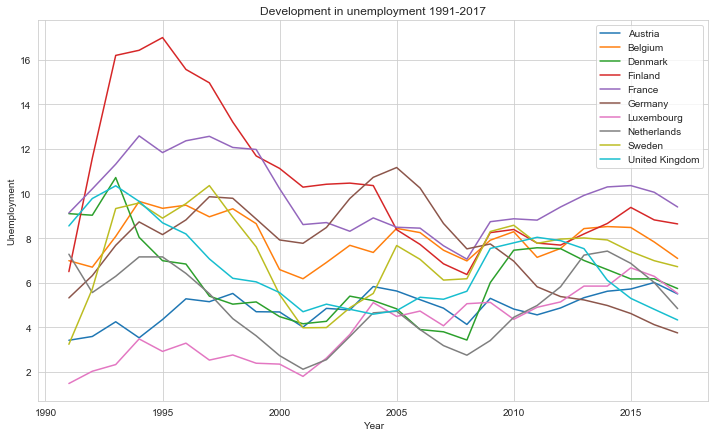

In [71]:
#Development in unemployment over time - eu countries
merge_eu.set_index('year').groupby('country')['unemployment'].plot(legend=True, figsize=(12,7))
plt.title("Development in unemployment 1991-2017")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.show()

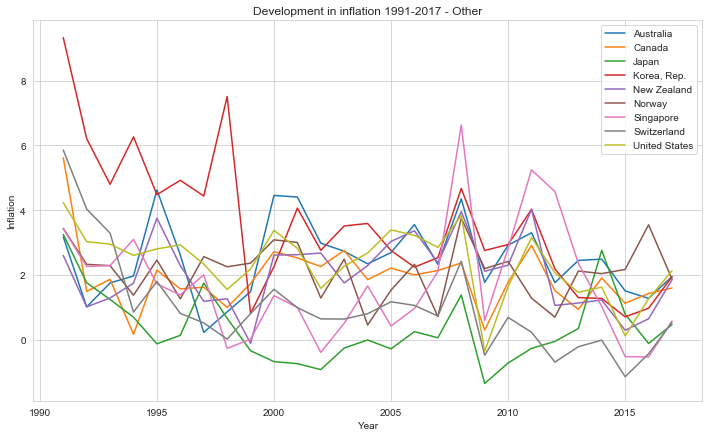

In [102]:
  #Development in inflation over time - other countries
merge_other.set_index('year').groupby('country')['inflation'].plot(legend=True, figsize=(12,7))
plt.title("Development in inflation 1991-2017 - Other")
plt.xlabel("Year")
plt.ylabel("Inflation")
plt.show()

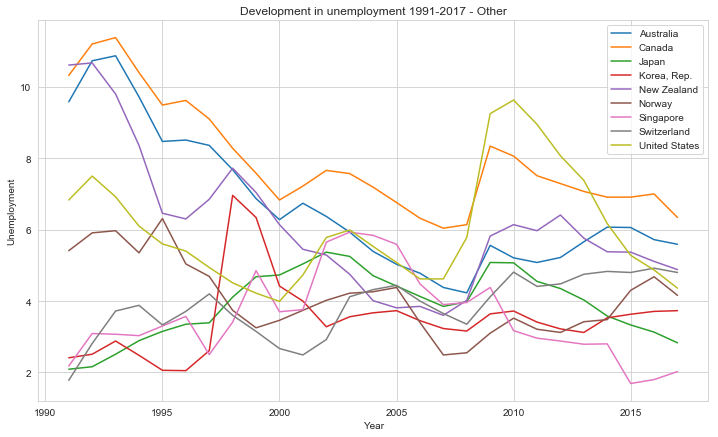

In [103]:
#Development in unemployment over time - other countries
merge_other.set_index('year').groupby('country')['unemployment'].plot(legend=True, figsize=(12,7))
plt.title("Development in unemployment 1991-2017 - Other")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.show()

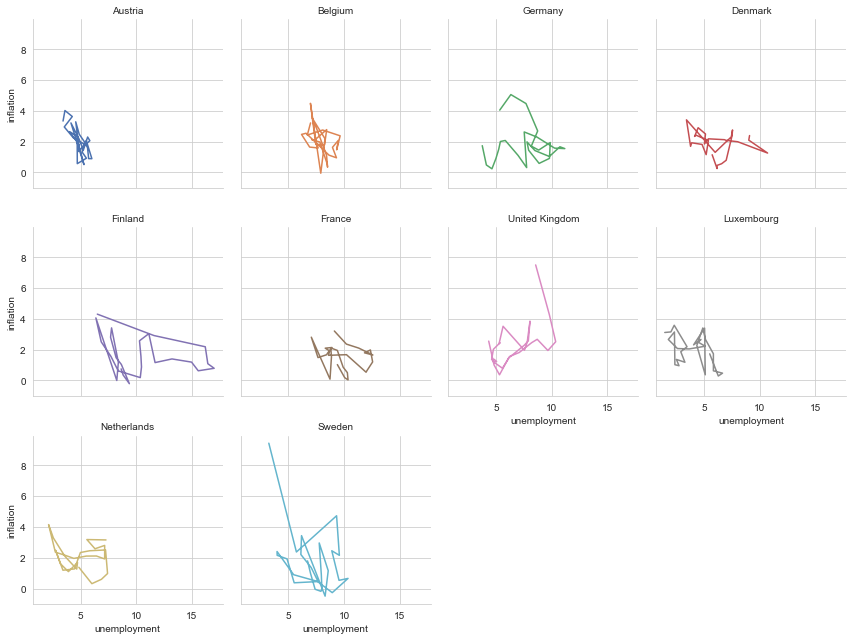

In [101]:
#Long-run correlation between unemployment and inflation (Long run Phillips curve)
sns.set_style("whitegrid") # Setting seaborn graphstyle to "whitegrid"
LRPC_eu = sns.FacetGrid(merge_eu, col='country', hue='country', col_wrap=4, palette="deep")
LRPC_eu = LRPC_eu.map(plt.plot, 'unemployment', 'inflation').set_titles("{col_name}") 

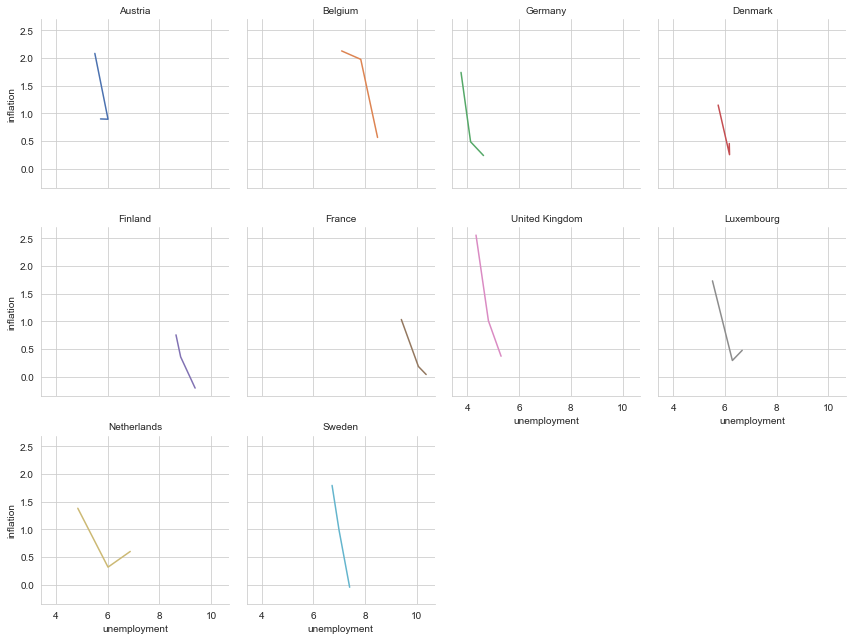

In [22]:
#Short-run correlation between unemployment and inflation (SRPC) for EU-countries
SRPC_eu = sns.FacetGrid(after_QE, col='country', hue='country', col_wrap=4, palette="deep")
SRPC_eu = SRPC_eu.map(plt.plot, 'unemployment', 'inflation').set_titles("{col_name}") 

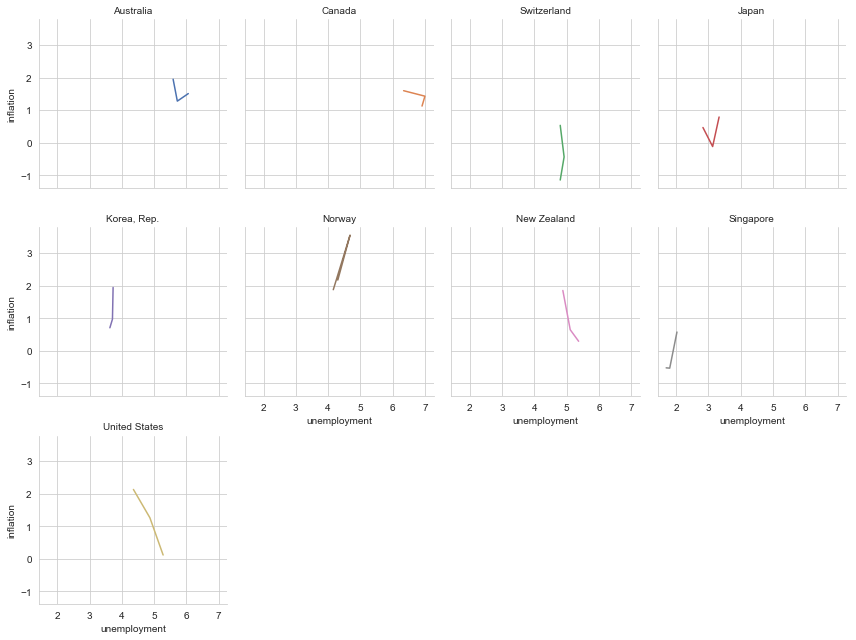

In [95]:
#Short-run correlation between unemployment and inflation (SRPC) for "Other" sample. 
SRPC_other = sns.FacetGrid(after_QE_other, col='country', hue='country', col_wrap=4, palette="deep")
SRPC_other = SRPC_other.map(plt.plot, 'unemployment', 'inflation').set_titles("{col_name}") 

**5. Panel data regression analysis**

In [73]:
#Panel data regression for full sample
merge_eu = merge_eu.reset_index()
year_full = pd.Categorical(merge_eu.year)
merge_eu = merge_eu.set_index(['country','year'])
merge_eu['year']=year_full
regression1=PanelOLS(merge_eu.inflation, merge_eu.unemployment, entity_effects=True)
res1 = regression1.fit(cov_type='clustered', cluster_entity=True)
print(res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:              inflation   R-squared:                        0.0355
Estimator:                   PanelOLS   R-squared (Between):             -1.0624
No. Observations:                 270   R-squared (Within):               0.0355
Date:                Tue, Apr 02 2019   R-squared (Overall):             -0.7699
Time:                        13:49:46   Log-likelihood                   -414.68
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.5229
Entities:                          10   P-value                           0.0022
Avg Obs:                       27.000   Distribution:                   F(1,259)
Min Obs:                       27.000                                           
Max Obs:                       27.000   F-statistic (robust):             3.3603
                            

In [34]:
# Panel data regression for data after QE
after_QE = after_QE.reset_index()
year_QE = pd.Categorical(after_QE.year)
after_QE = after_QE.set_index(['country','year'])
after_QE['year']=year_QE
regression2=PanelOLS(after_QE.inflation, after_QE.unemployment, entity_effects=True)
res2 = regression2.fit(cov_type='clustered', cluster_entity=True)
print(res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:              inflation   R-squared:                        0.6374
Estimator:                   PanelOLS   R-squared (Between):             -76.340
No. Observations:                  30   R-squared (Within):               0.6374
Date:                Tue, Apr 02 2019   R-squared (Overall):             -54.030
Time:                        13:02:16   Log-likelihood                   -12.691
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      33.402
Entities:                          10   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                    F(1,19)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             15.784
                            

In [8]:
# Panel data regression for data after QE for non-EU countries
after_QE_other = after_QE_other.reset_index()
year_QE_other = pd.Categorical(after_QE_other.year)
after_QE_other = after_QE_other.set_index(['country','year'])
after_QE_other['year']=year_QE_other
regression3=PanelOLS(after_QE_other.inflation, after_QE_other.unemployment, entity_effects=True)
res3 = regression3.fit(cov_type='clustered', cluster_entity=True)
print(res3)

                          PanelOLS Estimation Summary                           
Dep. Variable:              inflation   R-squared:                        0.0443
Estimator:                   PanelOLS   R-squared (Between):             -7.4210
No. Observations:                  27   R-squared (Within):               0.0443
Date:                Tue, Apr 02 2019   R-squared (Overall):             -6.1839
Time:                        15:51:47   Log-likelihood                   -22.592
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.7888
Entities:                           9   P-value                           0.3868
Avg Obs:                       3.0000   Distribution:                    F(1,17)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             0.4989
                            